<a href="https://colab.research.google.com/github/ryyutku/2604-CW/blob/main/Bank_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [324]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline


from sklearn.model_selection import cross_val_score, GridSearchCV

In [271]:
df = pd.read_csv('bank.csv')

In [272]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [273]:
df.shape

(45211, 17)

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [275]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


For One hot encoding - job, marital

(might put the following into Ordinal encoding depending with the results) - education, month

Duration is highly affects the database, will check into how its existence affect the final output




In [276]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [277]:
df['Subscribed'] = df['y'].map({'yes':1, 'no':0})

In [278]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,Subscribed
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


The people who have subscribed = 1

The people who have not subscribed = 0

#### Checking how the features affect the final result in the Subscription

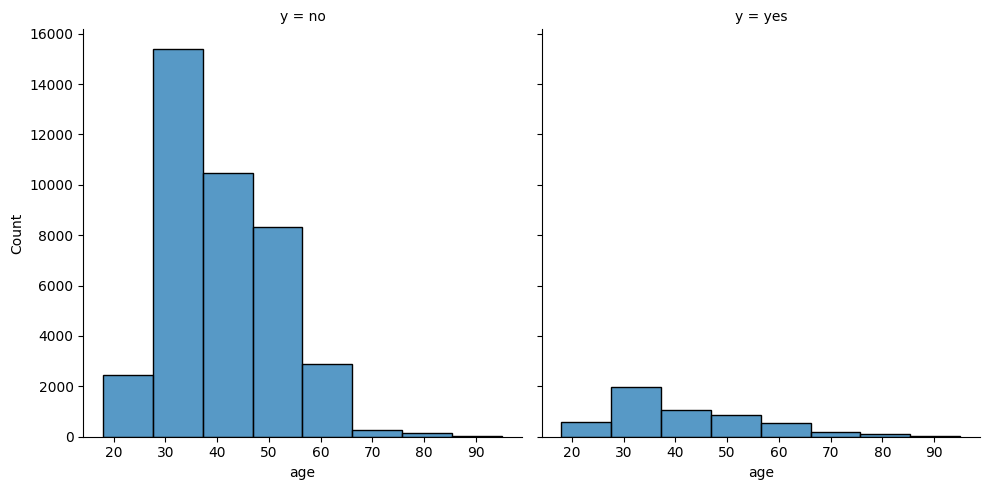

In [279]:
# Age
sns.displot(df, x='age', col='y', binwidth = 10, height= 5)

In [280]:
df['age_cut'] = pd.qcut(df['age'], 8)

In [281]:
df.groupby(['age_cut'], as_index=False)['Subscribed'].mean()

<ipython-input-281-7f3894cc1890>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['age_cut'], as_index=False)['Subscribed'].mean()


,age_cut,Subscribed
0,"(17.999, 30.0]",0.162873
1,"(30.0, 33.0]",0.105237
2,"(33.0, 36.0]",0.106927
3,"(36.0, 39.0]",0.098301
4,"(39.0, 43.0]",0.089127
5,"(43.0, 48.0]",0.091233
6,"(48.0, 55.0]",0.092239
7,"(55.0, 95.0]",0.184898


In [282]:
# Assigning bins for the 'age' column
df.loc[df['age'] <= 30, 'age'] = 0
df.loc[(df['age'] > 30) & (df['age'] <= 33), 'age'] = 1
df.loc[(df['age'] > 33) & (df['age'] <= 36), 'age'] = 2
df.loc[(df['age'] > 36) & (df['age'] <= 39), 'age'] = 3
df.loc[(df['age'] > 39) & (df['age'] <= 43), 'age'] = 4
df.loc[(df['age'] > 43) & (df['age'] <= 48), 'age'] = 5
df.loc[(df['age'] > 48) & (df['age'] <= 55), 'age'] = 6
df.loc[(df['age'] > 55) & (df['age'] <= 95), 'age'] = 7
df.loc[df['age'] > 95, 'age']

,age


In [283]:
# Job
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [284]:
df.groupby(['job'], as_index=False)['Subscribed'].mean()

,job,Subscribed
0,admin.,0.122027
1,blue-collar,0.072750
2,entrepreneur,0.082717
3,housemaid,0.087903
4,management,0.137556
5,retired,0.227915
6,self-employed,0.118429
7,services,0.088830
8,student,0.286780
9,technician,0.110570


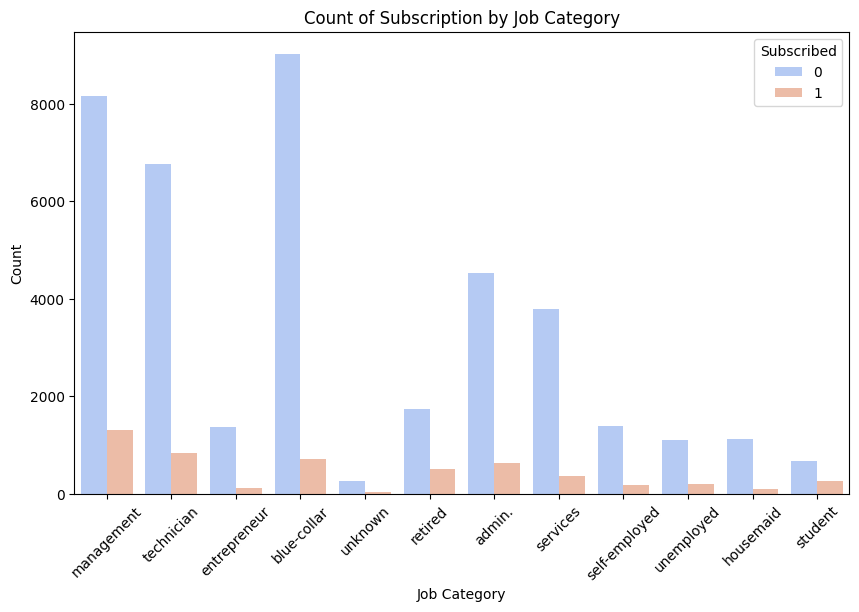

In [285]:
# Set up the plot size
plt.figure(figsize=(10, 6))

# Create the count plot using Seaborn
sns.countplot(x='job', hue='Subscribed', data=df, palette='coolwarm')

# Add labels and title
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.title('Count of Subscription by Job Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [286]:
job_mapping = {
    'unknown': 'miscellaneous',
    'technician': 'miscellaneous',
    'self-employed': 'miscellaneous',
    'management': 'management',
    'admin': 'management',
    'blue-collar':'services',
    'entrrepreneur':'services',
    'services':'services',
    'housemaid':'services',
    'retired':'retired',
    'student':'student',
    'unemployed':'unemployed'
}

In [287]:
df['job_category'] = df['job'].map(job_mapping)

In [288]:
df.groupby(['job_category'], as_index=False)['Subscribed'].mean()

,job_category,Subscribed
0,management,0.137556
1,miscellaneous,0.112109
2,retired,0.227915
3,services,0.078408
4,student,0.286780
5,unemployed,0.155027


Most likely to subscribe - students, retired

Less likely to subscribe - bue-collar, housemaid, entrepreneur, services

In [289]:
df.groupby(['marital'], as_index=False)['Subscribed'].mean()

,marital,Subscribed
0,divorced,0.119455
1,married,0.101235
2,single,0.149492


In [290]:
df.groupby(['education'], as_index=False)['Subscribed'].mean()

,education,Subscribed
0,primary,0.086265
1,secondary,0.105594
2,tertiary,0.150064
3,unknown,0.135703


1 - primary
2 - secondary
3 - unkown
4 - tertiary

In [291]:
education_mapping = {
    'primary': 1,
    'secondary': 2,
    'unknown': 3,
    'tertiary': 4
}

In [292]:
df['education_category'] = df['education'].map(education_mapping)

The likelihood of subscibing increases with the education level, unkown having the most likelihood of subscribing

In [293]:
df.groupby(['default'], as_index=False)['Subscribed'].mean()

,default,Subscribed
0,no,0.117961
1,yes,0.063804


In [294]:
# Balance
df['balance_cut'] = pd.qcut(df['balance'], 10)

In [295]:
df.groupby(['balance_cut'], as_index=False)['Subscribed'].mean()

<ipython-input-295-b9bdc25bdf17>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['balance_cut'], as_index=False)['Subscribed'].mean()


,balance_cut,Subscribed
0,"(-8019.001, 0.0]",0.068956
1,"(0.0, 22.0]",0.072194
2,"(22.0, 131.0]",0.091769
3,"(131.0, 272.0]",0.108282
4,"(272.0, 448.0]",0.114127
5,"(448.0, 701.0]",0.120080
6,"(701.0, 1126.0]",0.126823
7,"(1126.0, 1859.0]",0.142477
8,"(1859.0, 3574.0]",0.166114
9,"(3574.0, 102127.0]",0.161248


More balance more likely to subscribe

In [296]:
df.loc[df['balance'] <= 0, 'balance'] = 0
df.loc[(df['balance'] > 0) & (df['balance'] <= 22), 'balance'] = 1
df.loc[(df['balance'] > 22) & (df['balance'] <= 131), 'balance'] = 2
df.loc[(df['balance'] > 131) & (df['balance'] <= 272), 'balance'] = 3
df.loc[(df['balance'] > 272) & (df['balance'] <= 448), 'balance'] = 4
df.loc[(df['balance'] > 448) & (df['balance'] <= 701), 'balance'] = 5
df.loc[(df['balance'] > 701) & (df['balance'] <= 1126), 'balance'] = 6
df.loc[(df['balance'] > 1126) & (df['balance'] <= 1859), 'balance'] = 8
df.loc[(df['balance'] > 3574) & (df['balance'] <= 102127), 'balance'] = 9
df.loc[df['balance'] > 102127, 'balance']

,balance


In [297]:
# Housing
df.groupby(['housing'], as_index=False)['Subscribed'].mean()

,housing,Subscribed
0,no,0.167024
1,yes,0.077000


In [298]:
df.groupby(['loan'], as_index=False)['Subscribed'].mean()

,loan,Subscribed
0,no,0.126557
1,yes,0.066814


In [299]:
df.groupby(['contact'], as_index=False)['Subscribed'].mean()

,contact,Subscribed
0,cellular,0.149189
1,telephone,0.134205
2,unknown,0.040707


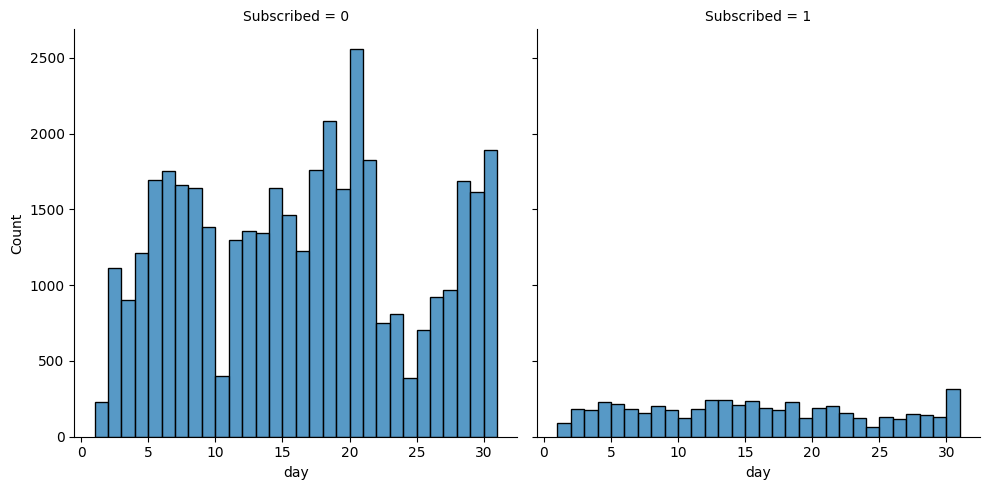

In [300]:
# Day
sns.displot(df, x='day', col='Subscribed', binwidth = 1, height= 5)

In [301]:
df['day_cut'] = pd.qcut(df['day'], 10)

In [302]:
df.groupby(['day_cut'], as_index=False)['Subscribed'].mean()

<ipython-input-302-eb57577f112b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['day_cut'], as_index=False)['Subscribed'].mean()


,day_cut,Subscribed
0,"(0.999, 5.0]",0.147958
1,"(5.0, 7.0]",0.090157
2,"(7.0, 10.0]",0.127578
3,"(10.0, 13.0]",0.142704
4,"(13.0, 16.0]",0.128876
5,"(16.0, 18.0]",0.095126
6,"(18.0, 20.0]",0.069639
7,"(20.0, 24.0]",0.125782
8,"(24.0, 28.0]",0.112308
9,"(28.0, 31.0]",0.112797


Day of the week doesn't seem to have affected much, might drop the column

In [303]:
df.groupby(['month'], as_index=False)['Subscribed'].mean()

,month,Subscribed
0,apr,0.196794
1,aug,0.110133
2,dec,0.467290
3,feb,0.166478
4,jan,0.101212
5,jul,0.090935
6,jun,0.102228
7,mar,0.519916
8,may,0.067195
9,nov,0.101511


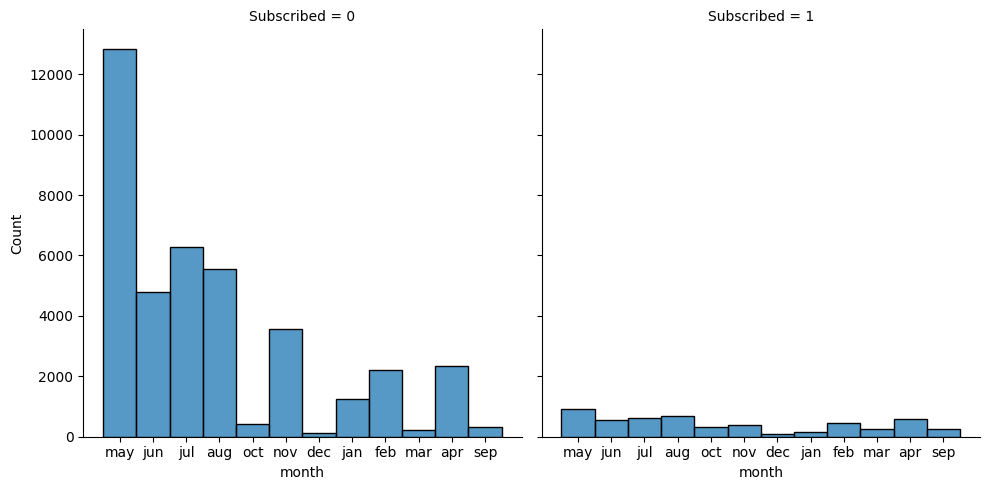

In [304]:
sns.displot(df, x='month', col='Subscribed', binwidth=1, height=5)

Most subscription - sep, oct,  dec, mar

In [305]:
# Duration
print(df['duration'].max())
print(df['duration'].min())

4918
0


In [306]:
df['duration_cut'] = pd.qcut(df['duration'], 10)

In [307]:
df.groupby(['duration_cut'], as_index=False)['Subscribed'].mean()

<ipython-input-307-4988703e9237>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['duration_cut'], as_index=False)['Subscribed'].mean()


,duration_cut,Subscribed
0,"(-0.001, 58.0]",0.001987
1,"(58.0, 89.0]",0.012456
2,"(89.0, 117.0]",0.028476
3,"(117.0, 147.0]",0.045793
4,"(147.0, 180.0]",0.068060
5,"(180.0, 223.0]",0.090488
6,"(223.0, 280.0]",0.123312
7,"(280.0, 368.0]",0.137869
8,"(368.0, 548.0]",0.208527
9,"(548.0, 4918.0]",0.455413


In [308]:
df.loc[df['duration'] <= 0, 'duration'] = 0
df.loc[(df['duration'] > 0) & (df['duration'] <= 22), 'duration'] = 1
df.loc[(df['duration'] > 22) & (df['duration'] <= 131), 'duration'] = 2
df.loc[(df['duration'] > 131) & (df['duration'] <= 272), 'duration'] = 3
df.loc[(df['duration'] > 272) & (df['duration'] <= 448), 'duration'] = 4
df.loc[(df['duration'] > 448) & (df['duration'] <= 701), 'duration'] = 5
df.loc[(df['duration'] > 701) & (df['duration'] <= 1126), 'duration'] = 6
df.loc[(df['duration'] > 1126) & (df['duration'] <= 1859), 'duration'] = 8
df.loc[(df['duration'] > 3574) & (df['duration'] <= 102127), 'duration'] = 9
df.loc[df['duration'] > 102127, 'duration']

,duration


Duration affects the likelihood of subscription according to the description

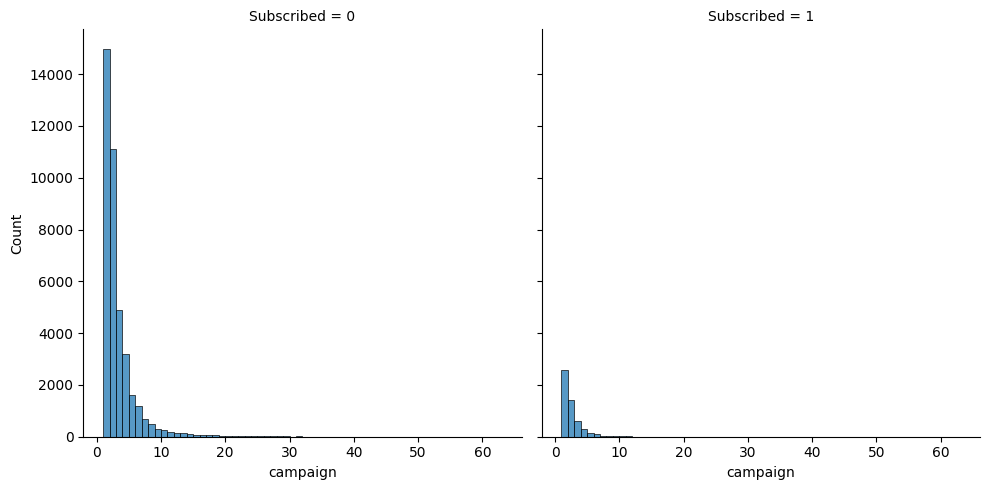

In [309]:
# Campaign
sns.displot(df, x='campaign', col='Subscribed', binwidth=1, height=5)

In [310]:
df['campaign_cut'] = pd.qcut(df['campaign'], 5, duplicates='drop')

In [311]:
df.groupby(['campaign_cut'], as_index=False)['Subscribed'].mean()

<ipython-input-311-1d29a5111047>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['campaign_cut'], as_index=False)['Subscribed'].mean()


,campaign_cut,Subscribed
0,"(0.999, 2.0]",0.131851
1,"(2.0, 4.0]",0.103395
2,"(4.0, 63.0]",0.064063


In [312]:
df.loc[df['campaign'] <= 2.0, 'campaign'] = 0
df.loc[(df['campaign'] > 2.0) & (df['campaign'] <= 4), 'campaign'] = 1
df.loc[(df['campaign'] > 4) & (df['campaign'] <= 63), 'campaign'] = 2
df.loc[df['campaign'] > 63, 'campaign']

,campaign


Might drop it

NOTE: Has duplicates

In [313]:
# Passed days (pdays)
df['pdays_cut'] = pd.qcut(df['pdays'], 10, duplicates= 'drop')

In [314]:
df.groupby(['pdays_cut'], as_index=False)['Subscribed'].mean()

<ipython-input-314-4e6fd00ccca5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['pdays_cut'], as_index=False)['Subscribed'].mean()


,pdays_cut,Subscribed
0,"(-1.001, 185.0]",0.113030
1,"(185.0, 871.0]",0.152802


In [315]:
# Create a new column 'pdays_category' that categorizes the values
df['pdays_category'] = df['pdays'].apply(lambda x: 'Not Contacted' if x == -1 else 'Contacted')

In [316]:
df.groupby('pdays_category', as_index=False)['Subscribed'].mean()

,pdays_category,Subscribed
0,Contacted,0.230713
1,Not Contacted,0.091573


If not contacted 0, if contacted 1

In [317]:
# Previous Contacted before this campaign
df['previous_cut'] = pd.qcut(df['previous'], 100, duplicates='drop')

In [318]:
df.groupby(['previous_cut'], as_index=False)['Subscribed'].mean()

<ipython-input-318-4706861de8be>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['previous_cut'], as_index=False)['Subscribed'].mean()


,previous_cut,Subscribed
0,"(-0.001, 1.0]",0.099859
1,"(1.0, 2.0]",0.216524
2,"(2.0, 3.0]",0.257443
3,"(3.0, 4.0]",0.239496
4,"(4.0, 5.0]",0.263617
5,"(5.0, 6.0]",0.299639
6,"(6.0, 8.9]",0.278443
7,"(8.9, 275.0]",0.229581


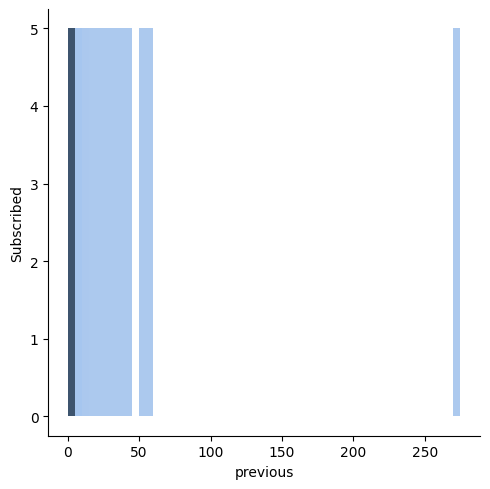

In [319]:
sns.displot(df, x='previous', y='Subscribed', binwidth = 5, height= 5)

Might drop previous

In [320]:
# Previous outcome of the marketing campaign (poutcome)
df.groupby(['poutcome'], as_index=False)['Subscribed'].mean()

,poutcome,Subscribed
0,failure,0.126097
1,other,0.166848
2,success,0.647253
3,unknown,0.091615


#### Data Cleaning

In [321]:
df.isnull().sum()


,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   age                 45211 non-null  int64   
 1   job                 45211 non-null  object  
 2   marital             45211 non-null  object  
 3   education           45211 non-null  object  
 4   default             45211 non-null  object  
 5   balance             45211 non-null  int64   
 6   housing             45211 non-null  object  
 7   loan                45211 non-null  object  
 8   contact             45211 non-null  object  
 9   day                 45211 non-null  int64   
 10  month               45211 non-null  object  
 11  duration            45211 non-null  int64   
 12  campaign            45211 non-null  int64   
 13  pdays               45211 non-null  int64   
 14  previous            45211 non-null  int64   
 15  poutcome            45211 non-null  

Dropping tables - day, campaign, previous

In [326]:
ohe_cols = ['job_category','marital','education_category','default','housing','loan','contact','month','poutcome','pdays_category']

In [327]:
ode_cols = ['education']

In [335]:
drop_cols = ['y','day','day_cut','age_cut','balance_cut','duration_cut','campaign_cut','pdays_cut','previous_cut','education']

In [336]:
X = df.drop(columns=drop_cols+['Subscribed'])
y = df['Subscribed']

In [337]:
X.head()

,age,job,marital,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,job_category,education_category,pdays_category
0,7,management,married,no,2143,yes,no,unknown,may,3,0,-1,0,unknown,management,4,Not Contacted
1,5,technician,single,no,2,yes,no,unknown,may,3,0,-1,0,unknown,miscellaneous,2,Not Contacted
2,1,entrepreneur,married,no,1,yes,yes,unknown,may,2,0,-1,0,unknown,NaN,2,Not Contacted
3,5,blue-collar,married,no,8,yes,no,unknown,may,2,0,-1,0,unknown,services,3,Not Contacted
4,1,unknown,single,no,1,no,no,unknown,may,3,0,-1,0,unknown,miscellaneous,3,Not Contacted


In [338]:
X.shape

(45211, 17)

#### Pipeline